In [179]:
import numpy as np
import pandas as pd
from math import log
import math
from statistics import mean


In [180]:
import json
def parse_json(s):
    try:
        return json.loads(s)
    except json.JSONDecodeError:
        return None

In [181]:
manufacturers = pd.read_csv("Dataset/verusen_manufacturer_names_materialdetail_export_11032022.csv")
mat_grp_mapping = pd.read_excel("Dataset/Verusend mat grp mapping to category.xlsx",header = 1)
#new_data = pd.read_csv("Dataset/verusen_manufacturer_names_materialdetail_export_11032022.csv")


In [182]:
from sklearn.preprocessing import LabelBinarizer
manufacturers['material_groups_new']  = manufacturers.material_groups.apply(str).apply(parse_json)
materials_manufacturer_matgrpcategories = manufacturers.explode('material_groups_new')
# Drop NONE Rows
materials_manufacturer_matgrpcategories.dropna(inplace = True)

# materials_manufacturer_matgrpcategories['vectors'] = [row for row in LabelBinarizer().fit_transform(materials_manufacturer_matgrpcategories['material_groups_new'])]
# materials_manufacturer_matgrpcategories.set_index('manufacturer_name')

In [183]:
materials_manufacturer_matgrpcategories.drop(['material_groups','material_descriptions',],axis = 1,inplace = True)
materials_manufacturer_matgrpcategories = mat_grp_mapping.merge(materials_manufacturer_matgrpcategories,how = 'inner',left_on = 'material_group',right_on = 'material_groups_new')
materials_manufacturer_matgrpcategories['material_groups_new'] = materials_manufacturer_matgrpcategories['Category L1']
materials_manufacturer_matgrpcategories = materials_manufacturer_matgrpcategories[materials_manufacturer_matgrpcategories['material_groups_new'].notna()]


In [184]:
materials_manufacturer_matgrpcategories.head()

Unnamed: 0 Category L1         material_group manufacturer_name  \
133376         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133377         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133378         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133379         NaN   Abrasives  8511-COATED ABRASIVES                3M   
133380         NaN   Abrasives  8511-COATED ABRASIVES                3M   

        num_materials  num_stock_materials  average_value material_groups_new  
133376         104801                 7313     250.222914           Abrasives  
133377         104801                 7313     250.222914           Abrasives  
133378         104801                 7313     250.222914           Abrasives  
133379         104801                 7313     250.222914           Abrasives  
133380         104801                 7313     250.222914           Abrasives

In [185]:
materialgroups_onehot = LabelBinarizer()
materialgroups_onehot.fit(materials_manufacturer_matgrpcategories["material_groups_new"])

LabelBinarizer()

In [186]:
#temp_df.to_csv("Dataset/Material_OneHot.csv",index = True)
temp_df_1 = pd.read_csv("Dataset/Material_OneHot.csv")

In [187]:
temp_df_1['combined'] = temp_df_1[temp_df_1.columns[1:]].apply(lambda row: ','.join(row.values.astype(str)), axis=1)


In [188]:
temp_df_1.drop(columns = temp_df_1.columns[1:34],inplace = True)

In [189]:
res = pd.read_csv('Dataset/New_data.csv',index_col=None)

In [190]:
res

Company_A                 Company_B  Label  no_mat_A  no_stock_A  \
0                ABB      ABB AUTOMATION, INC.    1.0      5800        3825   
1                ABB           ABB CONTROL INC    1.0      5800        3825   
2         ABSOLUENGI  ABSOLUTE ENGINEERING LTD    1.0        20          20   
3           ACCUFORM            ACCUFORM SIGNS    1.0        13          11   
4     ACCUFORM SIGNS            ACCUFORM SIGNS    1.0      2561         119   
...              ...                       ...    ...       ...         ...   
1388   BW TECHNOLOGY                    YORGOS    0.0         2           0   
1389          SABROE                      YORK    1.0       481          68   
1390   BSM PUMP CORP               ZERAND CORP    0.0         5           3   
1391          ZERAND               ZERAND CORP    1.0      3804        1079   
1392       HAGEMEYER             ZIEGLER TOOLS    0.0       142          98   

                                              mat_grp_A  \
0     {NULL,"TERMINATION,ELECT","DRIVE,DC","RING,GNR...   
1     {NULL,"TERMINATION,ELECT","DRIVE,DC","RING,GNR...   
2             {-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-}   
3     {P,NULL,NP,NULL,NS,NP,NULL,NULL,NULL,NULL,NULL...   
4     {"8173-LOCKOUT/TAG OUT  SECURITY","5655-PIPE W...   
...                                                 ...   
1388                              {301001086,301001086}   
1389  {319999999,312604003,0400004,0600016,0400004,0...   
1390       {MS270000,MS380000,ER12500,MS270000,ER12600}   
1391  {MS170020,MS390000,MS390000,MS240000,MS390000,...   
1392  {"PPE,GNRL","PPE,GNRL","PPE,GNRL","PPE,GNRL","...   

                                             mat_desc_A    avg_val_A  \
0     {"RELAY,OVERLOAD,THERMAL,32 A,600 VAC,0.335 KG...  2460.260963   
1     {"RELAY,OVERLOAD,THERMAL,32 A,600 VAC,0.335 KG...  2460.260963   
2     {"COUPLING,GNRL,ACP 01-022,TAIL","COUPLING,GNR...    80.282000   
3     {"SYS:P-PFB TAPE; TYPE: BARRICADE; LABELED: MA...    26.516795   
4     {"TAM103PTP SMALL LOCKOUT TAGS PACK OF 25","94...    38.574910   
...                                                 ...          ...   
1388  {"SENSOR;DO DETEC GAS BW TECHNOLOGY;544990","S...  1000.000000   
1389  {"KIT;DE JUNTAS;P/ CONEXAO INTERMEDIARIA;D",AN...  2683.435363   
1390  {"PMP,GEAR,71327,BSM PUMP","PMP,HYD,2009719,BS...  1342.372000   
1391  {"ROLL,100563L,ZER,PRESS","STUD FOR STRIPPER S...   404.066951   
1392  {"PPE,GNRL9000TO0245 X LARGEPERSON,SZ:X LARGE,...   168.993822   

      no_mat_B  no_stock_B                                          mat_grp_B  \
0           50          38  {"BATTERY,RECHARGABLE","STARTER,ELECTRICAL","E...   
1           24          22  {"MODULE,ELECTRICAL","TRANSFORMER,CONTROL","BR...   
2           52          49  {"COVER,MECH","DOCTOR,GNRL","DOCTOR,GNRL","SCR...   
3         2561         119  {"8173-LOCKOUT/TAG OUT  SECURITY","5655-PIPE W...   
4         2561         119  {"8173-LOCKOUT/TAG OUT  SECURITY","5655-PIPE W...   
...        ...         ...                                                ...   
1388         1           0                                        {319999999}   
1389       326         147  {69542,"COMPONENT,GNRL",0400032,"COMPONENT,GNR...   
1390         7           6        {69832,26000,69832,22330,69837,09235,69832}   
1391         7           6        {69832,26000,69832,22330,69837,09235,69832}   
1392        22          11  {C10,C38,C10-9191,NULL,C10,C10-9191,C10,NP,NP,...   

                                             mat_desc_B    avg_val_B  
0     {"BATTERY,RECHARGABLE3BSE018172R1SB822, RECHAR...  4260.615700  
1     {"MODULE,ELECTRICAL3BHB006309R0001MODULE V1 PO...  1667.718542  
2     {"COVER,MECH,M041073-L,SPLASH GUARD, O.S. CHAM...    46.493494  
3     {"TAM103PTP SMALL LOCKOUT TAGS PACK OF 25","94...    38.574910  
4     {"TAM103PTP SMALL LOCKOUT TAGS PACK OF 25","94...    38.574910  
...                                                 ...          ...  
1388              

In [191]:
merged_data= temp_df_1.merge(res,how = 'inner',left_on = 'manufacturer_name',right_on = 'Company_A').drop(columns = ['manufacturer_name'])
#merged_data.rename(columns = {'combined':'combined_A'})
res= temp_df_1.merge(merged_data,how = 'inner',left_on = 'manufacturer_name',right_on = 'Company_B').drop(columns = ['manufacturer_name'])
res.rename(columns = {'combined_x':'combined_B','combined_y':'combined_A'},inplace = True)

In [192]:
res

combined_B  \
0    0,3,0,0,0,5,0,0,29,0,0,0,0,0,0,0,0,1,0,0,0,9,5...   
1    0,0,0,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0...   
2    1,10,0,0,0,4,1,0,1,3,0,0,0,0,0,0,0,0,0,3,0,0,0...   
3    0,5,0,0,0,55,0,0,10,22,0,0,0,0,0,0,0,1,0,0,0,0...   
4    1,2447,6,2,0,32797,6,0,142,261,0,933,0,183,6,0...   
..                                                 ...   
790  0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...   
791  0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...   
792  0,25,0,0,0,10,0,0,4,0,0,0,0,3,0,0,0,28,0,318,0...   
793  0,252,0,0,0,123,4,0,10,0,0,0,0,0,2,0,0,0,25,7,...   
794  1,12,0,0,0,391,1,0,8,10,0,136,0,31,0,0,0,0,1,2...   

                                            combined_A  \
0    0,3,0,0,0,5,0,0,29,0,0,0,0,0,0,0,0,1,0,0,0,9,5...   
1    0,3,0,0,0,85,0,0,0,0,0,0,0,7,0,0,0,0,0,3,0,0,0...   
2    0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...   
3    0,5,0,0,0,55,0,0,10,22,0,0,0,0,0,0,0,1,0,0,0,0...   
4    0,4,0,0,0,111,0,0,0,0,0,2,0,0,0,0,0,0,4,0,0,0,...   
..                                                 ...   
790  0,232,0,0,0,54,3,0,11,111,0,0,1,3,0,0,1,0,6,32...   
791  0,88,0,0,0,65,4,0,26,5,0,0,0,118,0,0,0,0,13,8,...   
792  0,88,0,0,0,65,4,0,26,5,0,0,0,118,0,0,0,0,13,8,...   
793  0,13,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...   
794  0,1,0,0,0,10,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0...   

                     Company_A             Company_B  Label  no_mat_A  \
0               ACCUFORM SIGNS        ACCUFORM SIGNS    1.0      2561   
1       ACTION INSTRUMENTS INC            ACTION PAK    4.0       106   
2        AES ENGINEERED SYSTEM  ALBANY ENGINEERED SY    0.0        15   
3           ALLEGRO INDUSTRIES    ALLEGRO INDUSTRIES    1.0       467   
4                   ALLENBRADL         ALLEN BRADLEY    1.0       601   
..                         ...                   ...    ...       ...   
790  SCHNEIDER PACKAGING EQUIP       YALE & TOWNE CO    0.0       996   
791                       YALE            YALE HOIST    1.0      1587   
792                       YALE           YALE HOISTS    1.0      1587   
793                   YAKASAWA               YASKAWA    1.0        28   
794  JOHNSON YOKOGAWA CORPORAT              YOKOGAWA    4.0        25   

     no_stock_A                                          mat_grp_A  \
0           119  {"8173-LOCKOUT/TAG OUT  SECURITY","5655-PIPE W...   
1            99  {"INDICATOR,GNRL","CONVERTER,GNRL","CONVERTER,...   
2            10  {"NOZZLE,GNRL","VALVE,BALL","FILTER,GNRL","IND...   
3            58  {"8881-OTHER INDUSTRIAL SUPPLIES","8881-OTHER ...   
4           545  {-,-,-,-,-,-,"POWER SUPPLY,ELEC",-,-,-,-,-,"MO...   
..          ...                                                ...   
790         434  {NULL,NULL,NULL,NULL,NULL,NULL,NULL,"TRANSMITT...   
791         707  {113000,NULL,C21,113000,C35-950,C35,NULL,C04-1...   
792         707  {113000,NULL,C21,113000,C35-950,C35,NULL,C04-1...   
793          25  {"DRIVE,AC","DRIVE,AC",NULL,NULL,"DRIVE,AC","D...   
794          22  {"CONTROL,ELECTRONIC","CONTROL,GNRL","ELEC,GNR...   

                                            mat_desc_A    avg_val_A  no_mat_B  \
0    {"TAM103PTP SMALL LOCKOUT TAGS PACK OF 25","94...    38.574910      2561   
1    {"INDICATOR,GNRL,V509-5000,DISPLAY IXYS MCC250...   370.664025        52   
2    {"NOZZLE,GNRLVF1/8S040078\"V\" FAN 40 DEGREE",...   291.538000        44   
3    {"9402-88 DLX WORK TENT HI-VIS GRN/WHT","4001L...    30.404098       467   
4    {"SWITCH,ROTARY,800EP-LSM24,SELECTOR SWITCH-2 ...   372.926855     52461   
..                                                 ...          ...       ...   
790  {"PUMP,VACUUM,JD-200-60,TRANSDUCER,,60PSI RATE...   244.532043         4   
791  {"ROD END:","ASSEMBLY,TUBE,STRAIGHT,12-80V,FLA...   270.831699         3   
792  {"ROD END:","ASSEMBLY,TUBE,STRAIGHT,12-80V,FLA...   270.831699       917   
793  {"DRIVE,AC,CIMR-AU4A23F,VAR FREQ, 15HP, 380-48...  1764.263929       857   
794  {"CONTROL,ELECTRONIC,YS-170,LOOP,535

In [193]:
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import multiprocessing

# def clean_data(text):
#     text = re.sub(r'[^ \nA-Za-z0-9À-ÖØ-öø-ÿ/]+', '', text)
#     text = re.sub(r'[\\/×\^\]\[÷]', '', text)
#     return text

def clean_data(text):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',text)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = ''.join((x for x in cleaned if not x.isdigit()))
    return cleaned


def change_lower(text):
    text = text.lower()
    return text

stopwords_list = stopwords.words("english")
def remover(text):
    text_tokens = text.split(" ")
    final_list = [word for word in text_tokens if not word in stopwords_list]
    text = ' '.join(final_list)
    return text

In [194]:
res[['Company_A']] = res[['Company_A']].astype(str)
res['Company_A'] = res['Company_A'].apply(change_lower)
res['Company_A'] = res['Company_A'].apply(clean_data)
res['Company_A'] = res['Company_A'].apply(remover)

res[['Company_B']] = res[['Company_B']].astype(str)
res['Company_B'] = res['Company_B'].apply(change_lower)
res['Company_B'] = res['Company_B'].apply(clean_data)
res['Company_B'] = res['Company_B'].apply(remover)

res[['mat_desc_A']] = res[['mat_desc_A']].astype(str)
res['mat_desc_A'] = res['mat_desc_A'].apply(change_lower)
res['mat_desc_A'] = res['mat_desc_A'].apply(clean_data)
res['mat_desc_A'] = res['mat_desc_A'].apply(remover)

res[['mat_desc_B']] = res[['mat_desc_B']].astype(str)
res['mat_desc_B'] = res['mat_desc_B'].apply(change_lower)
res['mat_desc_B'] = res['mat_desc_B'].apply(clean_data)
res['mat_desc_B'] = res['mat_desc_B'].apply(remover)

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [196]:
avg_len = ((res["Company_A"].str.len()).median()+(res["Company_B"].str.len()).median())/2

In [197]:
from similarity.jarowinkler import JaroWinkler
from pyjarowinkler import distance
res["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i,j in zip(res["Company_A"],res["Company_B"])]
res["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i,j in zip(res["Company_A"],res["Company_B"])]

In [198]:
res['ab'] = res.apply(lambda x : x['Company_A'] + ' ' + x['Company_B'], axis=1)

clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(res['ab'])


tfidf_a = clf_1.transform(res['Company_A'])
tfidf_b = clf_1.transform(res['Company_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_a[x],tfidf_b[x]) for x in range(len(tfidf_a)) ]
# res['Company_AB'] = row_similarities

res['Company_AB'] = np.diag(cosine_similarity(tfidf_a, tfidf_b))




In [199]:
res['desc_ab'] = res.apply(lambda x : x['mat_desc_A'] + ' ' + x['mat_desc_B'], axis=1)

clf_3 = TfidfVectorizer(ngram_range=(1, 1))
clf_3.fit(res['desc_ab'])


tfidf_desc_a = clf_3.transform(res['mat_desc_A'])
tfidf_desc_b = clf_3.transform(res['mat_desc_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
res['Desc_AB'] = np.diag(cosine_similarity(tfidf_desc_a,tfidf_desc_b))


In [200]:
res['cat_ab'] = res.apply(lambda x : x['combined_A'] + ' ' + x['combined_B'], axis=1)

clf_4 = TfidfVectorizer(ngram_range=(1, 1))
clf_4.fit(res['cat_ab'])


tfidf_cat_a = clf_4.transform(res['combined_A'])
tfidf_cat_b = clf_4.transform(res['combined_B'])

# row_similarities = [1 - spatial.distance.cosine(tfidf_grp_a[x],tfidf_grp_b[x]) for x in range(len(tfidf_grp_a)) ]
res['Cat_AB'] = np.diag(cosine_similarity(tfidf_cat_a,tfidf_cat_b))


In [201]:
res

combined_B  \
0    0,3,0,0,0,5,0,0,29,0,0,0,0,0,0,0,0,1,0,0,0,9,5...   
1    0,0,0,0,0,38,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0...   
2    1,10,0,0,0,4,1,0,1,3,0,0,0,0,0,0,0,0,0,3,0,0,0...   
3    0,5,0,0,0,55,0,0,10,22,0,0,0,0,0,0,0,1,0,0,0,0...   
4    1,2447,6,2,0,32797,6,0,142,261,0,933,0,183,6,0...   
..                                                 ...   
790  0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...   
791  0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...   
792  0,25,0,0,0,10,0,0,4,0,0,0,0,3,0,0,0,28,0,318,0...   
793  0,252,0,0,0,123,4,0,10,0,0,0,0,0,2,0,0,0,25,7,...   
794  1,12,0,0,0,391,1,0,8,10,0,136,0,31,0,0,0,0,1,2...   

                                            combined_A  \
0    0,3,0,0,0,5,0,0,29,0,0,0,0,0,0,0,0,1,0,0,0,9,5...   
1    0,3,0,0,0,85,0,0,0,0,0,0,0,7,0,0,0,0,0,3,0,0,0...   
2    0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...   
3    0,5,0,0,0,55,0,0,10,22,0,0,0,0,0,0,0,1,0,0,0,0...   
4    0,4,0,0,0,111,0,0,0,0,0,2,0,0,0,0,0,0,4,0,0,0,...   
..                                                 ...   
790  0,232,0,0,0,54,3,0,11,111,0,0,1,3,0,0,1,0,6,32...   
791  0,88,0,0,0,65,4,0,26,5,0,0,0,118,0,0,0,0,13,8,...   
792  0,88,0,0,0,65,4,0,26,5,0,0,0,118,0,0,0,0,13,8,...   
793  0,13,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...   
794  0,1,0,0,0,10,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0...   

                     Company_A             Company_B  Label  no_mat_A  \
0               accuform signs        accuform signs    1.0      2561   
1       action instruments inc            action pak    4.0       106   
2        aes engineered system  albany engineered sy    0.0        15   
3           allegro industries    allegro industries    1.0       467   
4                   allenbradl         allen bradley    1.0       601   
..                         ...                   ...    ...       ...   
790  schneider packaging equip       yale & towne co    0.0       996   
791                       yale            yale hoist    1.0      1587   
792                       yale           yale hoists    1.0      1587   
793                   yakasawa               yaskawa    1.0        28   
794  johnson yokogawa corporat              yokogawa    4.0        25   

     no_stock_A                                          mat_grp_A  \
0           119  {"8173-LOCKOUT/TAG OUT  SECURITY","5655-PIPE W...   
1            99  {"INDICATOR,GNRL","CONVERTER,GNRL","CONVERTER,...   
2            10  {"NOZZLE,GNRL","VALVE,BALL","FILTER,GNRL","IND...   
3            58  {"8881-OTHER INDUSTRIAL SUPPLIES","8881-OTHER ...   
4           545  {-,-,-,-,-,-,"POWER SUPPLY,ELEC",-,-,-,-,-,"MO...   
..          ...                                                ...   
790         434  {NULL,NULL,NULL,NULL,NULL,NULL,NULL,"TRANSMITT...   
791         707  {113000,NULL,C21,113000,C35-950,C35,NULL,C04-1...   
792         707  {113000,NULL,C21,113000,C35-950,C35,NULL,C04-1...   
793          25  {"DRIVE,AC","DRIVE,AC",NULL,NULL,"DRIVE,AC","D...   
794          22  {"CONTROL,ELECTRONIC","CONTROL,GNRL","ELEC,GNR...   

                                            mat_desc_A    avg_val_A  ...  \
0    {tamptp small lockout tags pack  - style stmc ...    38.574910  ...   
1    {indicator gnrl v- display ixys mcc converter ...   370.664025  ...   
2    {nozzle gnrlvf s\v\ fan  degree valve  ball  v...   291.538000  ...   
3    {- dlx work tent hi-vis grn wht lbl labels  pk...    30.404098  ...   
4    {switch rotary ep-lsm selector switch- a-b lig...   372.926855  ...   
..                                                 ...          ...  ...   
790  {pump vacuum jd-- transducer  psi rated rod gn...   244.532043  ...   
791  {rod end: assembly tube straight -v flash sy  ...   270.831699  ...   
792  {rod end: assembly tube straight -v flash sy  ...   270.831699  ...   
793  {drive ac cimr-auaf var freq  hp  -vac drive a...  1764.263929  ...   
794  {control electronic ys- loop  control gnrl pk-...  1610.728800  ...   

                   

In [234]:
df = res[['Company_A', 'Company_B', 'Label','Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Desc_AB','Cat_AB']]

In [ ]:
# Convert the labels of data as Label 1 and other data Label 0
df['Label'].loc[df['Label'] != 1] = 0

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_45138/2356711959.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

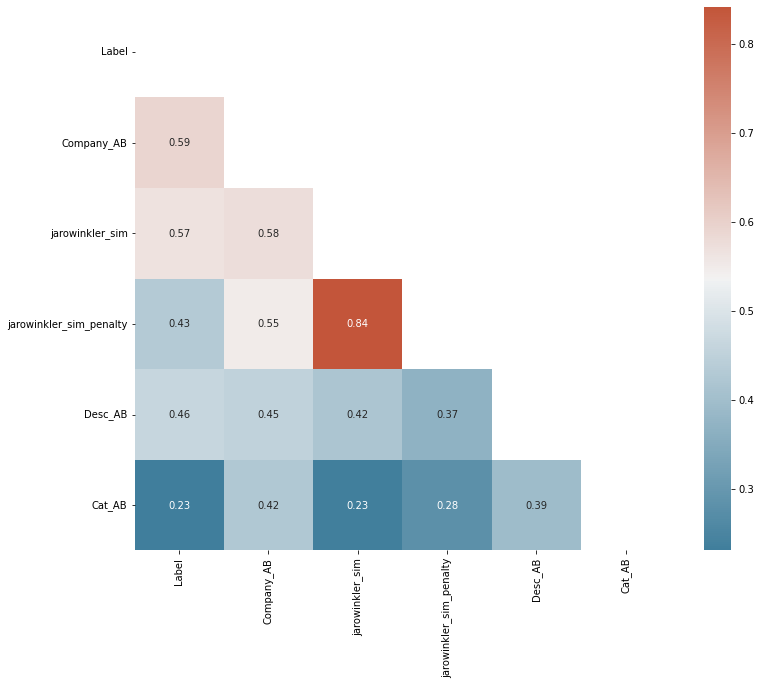

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
#
#
df.columns = ['Company_A', 'Company_B','Label', 'Company_AB','jarowinkler_sim','jarowinkler_sim_penalty','Desc_AB','Cat_AB']
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [237]:
df.replace([np.inf, -np.inf], 0, inplace=True)

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_45138/2462165146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], 0, inplace=True)


In [238]:
df = df[['Company_A','Company_B','Company_AB','Desc_AB','jarowinkler_sim','jarowinkler_sim_penalty','Cat_AB','Label']]

In [240]:
res[res['Company_B'] == 'allen bradley']

combined_B  \
4  1,2447,6,2,0,32797,6,0,142,261,0,933,0,183,6,0...   
5  1,2447,6,2,0,32797,6,0,142,261,0,933,0,183,6,0...   

                                          combined_A    Company_A  \
4  0,4,0,0,0,111,0,0,0,0,0,2,0,0,0,0,0,0,4,0,0,0,...   allenbradl   
5  0,20,0,0,0,278,0,0,0,0,0,0,0,4,0,0,0,0,0,4,0,0...  allenbradle   

       Company_B  Label  no_mat_A  no_stock_A  \
4  allen bradley    1.0       601         545   
5  allen bradley    1.0       358         285   

                                           mat_grp_A  \
4  {-,-,-,-,-,-,"POWER SUPPLY,ELEC",-,-,-,-,-,"MO...   
5  {"ENCODER,PULSE","LIGHT,GNRL","ELEC,GNRL","ELE...   

                                          mat_desc_A   avg_val_A  ...  \
4  {switch rotary ep-lsm selector switch- a-b lig...  372.926855  ...   
5  {encoder pulse encoder light gnrl t-na lens  a...  616.655531  ...   

                                          mat_desc_B    avg_val_B  \
4  {module electrical -eiogp-- v  ac module elect...  1233.890357   
5  {module electrical -eiogp-- v  ac module elect...  1233.890357   

  jarowinkler_sim_penalty jarowinkler_sim                         ab  \
4                0.870881            0.95   allenbradl allen bradley   
5                0.930414            0.97  allenbradle allen bradley   

   Company_AB                                            desc_ab   Desc_AB  \
4         0.0  {switch rotary ep-lsm selector switch- a-b lig...  0.861939   
5         0.0  {encoder pulse encoder light gnrl t-na lens  a...  0.723401   

                                              cat_ab Cat_AB  
4  0,4,0,0,0,111,0,0,0,0,0,2,0,0,0,0,0,0,4,0,0,0,...    0.0  
5  0,20,0,0,0,278,0,0,0,0,0,0,0,4,0,0,0,0,0,4,0,0...    0.0  

[2 rows x 23 columns]

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import cohen_kappa_score

In [242]:
Counter(df['Label'])

Counter({1.0: 254, 0.0: 541})

In [243]:
df

Company_A             Company_B  Company_AB   Desc_AB  \
0               accuform signs        accuform signs    1.000000  1.000000   
1       action instruments inc            action pak    0.532293  0.386556   
2        aes engineered system  albany engineered sy    0.314900  0.154131   
3           allegro industries    allegro industries    1.000000  1.000000   
4                   allenbradl         allen bradley    0.000000  0.861939   
..                         ...                   ...         ...       ...   
790  schneider packaging equip       yale & towne co    0.000000  0.061979   
791                       yale            yale hoist    0.691134  0.165171   
792                       yale           yale hoists    0.669288  0.588485   
793                   yakasawa               yaskawa    0.000000  0.669809   
794  johnson yokogawa corporat              yokogawa    0.615164  0.427413   

     jarowinkler_sim  jarowinkler_sim_penalty    Cat_AB  Label  
0               1.00                 1.000000  1.000000    1.0  
1               0.80                 0.800000  0.000000    0.0  
2               0.80                 0.800000  0.000000    0.0  
3               1.00                 1.000000  1.000000    1.0  
4               0.95                 0.870881  0.000000    1.0  
..               ...                      ...       ...    ...  
790             0.38                 0.380000  0.000000    0.0  
791             0.88                 0.401099  0.000000    1.0  
792             0.87                 0.446673  0.000000    1.0  
793             0.89                 0.456941  0.000000    1.0  
794             0.44                 0.440000  0.204921    0.0  

[795 rows x 8 columns]

In [244]:
# Assign values to the X and y variables:
X = df.iloc[:, :7].values
y = df.iloc[:, 7].values 

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=135)

In [246]:
X_train_new = [x[2:] for x in X_train]
X_test_new = [x[2:] for x in X_test]

In [247]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train_new)
X_train_new = imp.transform(X_train_new)
X_test_new = imp.transform(X_test_new) 

# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train_new)
X_train_new = scaler.transform(X_train_new)
X_test_new = scaler.transform(X_test_new) 

In [248]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_new, y_train) 

KNeighborsClassifier()

In [249]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test_new)

In [250]:
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 
print(accuracy_score(y_test, y_predict))

[[97  7]
 [17 38]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       104
         1.0       0.84      0.69      0.76        55

    accuracy                           0.85       159
   macro avg       0.85      0.81      0.82       159
weighted avg       0.85      0.85      0.84       159

0.8490566037735849


In [251]:
cohen_kappa_score(y_test, y_predict)

0.6515068493150684

In [252]:
# Random Forest Classifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier



threshold = 0.8



trainedforest = RandomForestClassifier(n_estimators=700).fit(X_train_new,y_train)
predicted_proba = trainedforest.predict_proba(X_test_new)
predictionforest = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionforest))



0.8176100628930818


In [253]:
cohen_kappa_score(y_test, predictionforest)

0.5442324799841851

## Logistic Classifier

In [254]:
from sklearn.linear_model import LogisticRegression

In [258]:
clf = LogisticRegression(random_state=0).fit(X_train_new,y_train)
predicted_proba = clf.predict_proba(X_test_new)
predictionLR = (predicted_proba[:,1] >= threshold).astype('int')

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predictionLR))


0.7672955974842768


## SGDClassifier

In [259]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(),
SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train_new,y_train)

predicted_SGD = clf.predict(X_test_new)
log_probab = clf.decision_function(X_test_new)

# print(confusion_matrix(y_test,predictionforest))
# print(classification_report(y_test,predictionforest))
# # Evaluate label (subsets) accuracy:
print(accuracy_score(y_test, predicted_SGD))

0.8679245283018868


In [260]:
cohen_kappa_score(y_test, predicted_SGD)

0.7068738477745589

## Testing on Unlabelled Data

In [169]:
manufacturers = manufacturers[['manufacturer_name','material_descriptions']]

In [170]:
temp_df_1

manufacturer_name  \
0       A & F MACHINE PRODUCTS   
1             A & M INDUSTRIES   
2                  A & S FERSA   
3      A & S PIN PRODUCTS INC.   
4      A F CHAPMAN CORPORATION   
...                        ...   
23384                     ZURN   
23385    ZURN INDUSTRIES, INC.   
23386    ZVL-ZKL BEARINGS CORP   
23387               ZWEI, INC.   
23388             ZXZ  (CHINA)   

                                                combined  
0      0,10,0,0,0,1,0,0,0,14,0,0,0,0,4,0,0,1,2,0,0,0,...  
1      0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
2      0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
3      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
4      4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
...                                                  ...  
23384  0,16,0,0,0,1,5,0,5,0,0,1,0,4,0,0,0,0,0,6,0,0,0...  
23385  0,12,0,0,0,9,0,0,30,12,0,3,0,0,3,0,0,2,0,3,0,2...  
23386  0,906,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,87,0,0...  
23387  0,3,0,0,0,0,0,0,0,25,0,0,0,0,2,0,0,0,0,0,0,0,0...  
23388  0,1,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...  

[23389 rows x 2 columns]

In [ ]:
temp_df_1['manufacturer_name'] == 'kobelt'

In [190]:
merged_data= temp_df_1.merge(manufacturers,how = 'inner',left_on = 'manufacturer_name',right_on = 'manufacturer_name')

In [191]:
merged_data  = merged_data.sample(1000)

In [193]:
merged_data[['manufacturer_name']] = merged_data[['manufacturer_name']].astype(str)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(change_lower)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(clean_data)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(remover)



In [194]:
merged_data[['material_descriptions']] = merged_data[['material_descriptions']].astype(str)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(change_lower)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(clean_data)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(remover)

In [195]:
clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(merged_data['manufacturer_name'])
tfidf_a = clf_1.transform(merged_data['manufacturer_name'])

In [196]:
clf_2 = TfidfVectorizer(ngram_range=(1, 1))
clf_2.fit(merged_data['material_descriptions'])
tfidf_desc = clf_2.transform(merged_data['material_descriptions'])

In [197]:
clf_3 = TfidfVectorizer(ngram_range=(1, 1))
clf_3.fit(merged_data['combined'])
tfidf_cat = clf_3.transform(merged_data['combined'])

In [198]:
merged_data

manufacturer_name  \
381    aerospace lubricants  inc   
7106                     farrell   
14356            neles automatio   
10574               james mcgraw   
2941          brenntag mid-south   
...                          ...   
5852               duable mfg co   
5260                   dean pump   
6037             dynalon labware   
15946              piab products   
14367          nelson & sons inc   

                                                combined  \
381    0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...   
7106   0,5,0,0,0,0,8,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,...   
14356  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...   
10574  0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...   
2941   0,0,1,0,0,1,0,0,1,0,0,0,0,0,7,0,0,0,0,0,0,0,0,...   
...                                                  ...   
5852   0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0...   
5260   0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...   
6037   0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...   
15946  0,4,2,0,0,0,0,0,1,21,0,0,0,0,0,0,0,0,0,2,0,0,0...   
14367  0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,...   

                                   material_descriptions  
381    [lubricant industrial tribogel  medium  - deg ...  
7106   [nut gnrlng-- pump gnrl--oil bearing thrustt-t...  
14356  [valve  ball  l recacjjsty bju l np  ball sz: ...  
10574  [  roller link   conn link motor gear: ;; rpm ...  
2941   [lb bag soda ash hf-l hyd fluid l po  dowfrost...  
...                                                  ...  
5852   [tess  filter cartridgefil pwirt   x-  flanged...  
5260          [pump  centrifugal  ra-xx   hot oil  gpm ]  
6037   [- ml w  \ handle shortpoly dippers - ml  ml g...  
15946  [cup vacuum f-  f--  vacuum cup  econoseals  f...  
14367  [\ x \ x - \ large bearing box  x  heavy block...  

[1000 rows x 3 columns]

In [199]:
unseen_data = pd.DataFrame()

In [200]:
unseen_data["Company pairs"] = [(i,j)for i in merged_data['manufacturer_name'][:1000] for j in merged_data['manufacturer_name'][:1000] ]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_43932/368563614.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  unseen_data["Company pairs"] = [(i,j)for i in merged_data['manufacturer_name'][:1000] for j in merged_data['manufacturer_name'][:1000] ]


In [201]:
from similarity.jarowinkler import JaroWinkler
from pyjarowinkler import distance

In [202]:
unseen_data["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i in merged_data['manufacturer_name'][:1000] for j in merged_data['manufacturer_name'][:1000] ]


/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_43932/3153831640.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  unseen_data["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i in merged_data['manufacturer_name'][:1000] for j in merged_data['manufacturer_name'][:1000] ]


In [203]:
unseen_data["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i in merged_data['manufacturer_name'][:1000] for j in merged_data['manufacturer_name'][:1000] ]


/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_43932/3426157225.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  unseen_data["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i in merged_data['manufacturer_name'][:1000] for j in merged_data['manufacturer_name'][:1000] ]


In [204]:
unseen_data["Company_AB"] = [j for sub in cosine_similarity(tfidf_a[:1000], tfidf_a[:1000]) for j in sub]

In [205]:
unseen_data["Desc_AB"] = [j for sub in cosine_similarity(tfidf_desc[:1000], tfidf_desc[:1000]) for j in sub]

In [206]:
unseen_data["Cat_AB"] = [j for sub in cosine_similarity(tfidf_cat[:1000], tfidf_cat[:1000]) for j in sub]

In [207]:
unseen_data

Company pairs  jarowinkler_sim  \
0       (aerospace lubricants  inc, aerospace lubrican...             1.00   
1                    (aerospace lubricants  inc, farrell)             0.41   
2            (aerospace lubricants  inc, neles automatio)             0.56   
3               (aerospace lubricants  inc, james mcgraw)             0.57   
4         (aerospace lubricants  inc, brenntag mid-south)             0.46   
...                                                   ...              ...   
999995                 (nelson & sons inc, duable mfg co)             0.49   
999996                     (nelson & sons inc, dean pump)             0.39   
999997               (nelson & sons inc, dynalon labware)             0.54   
999998                 (nelson & sons inc, piab products)             0.35   
999999             (nelson & sons inc, nelson & sons inc)             1.00   

        jarowinkler_sim_penalty  Company_AB   Desc_AB  Cat_AB  
0                          1.00         1.0  1.000000     0.0  
1                          0.41         0.0  0.000000     0.0  
2                          0.56         0.0  0.000000     0.0  
3                          0.57         0.0  0.000000     0.0  
4                          0.46         0.0  0.000000     0.0  
...                         ...         ...       ...     ...  
999995                     0.49         0.0  0.000000     0.0  
999996                     0.39         0.0  0.000000     0.0  
999997                     0.54         0.0  0.002001     0.0  
999998                     0.35         0.0  0.002837     0.0  
999999                     1.00         1.0  1.000000     0.0  

[1000000 rows x 6 columns]

In [237]:
max(unseen_data['Desc_AB'])

1.0000000000000009

In [225]:
X_unseen = unseen_data[['Company_AB','Desc_AB','jarowinkler_sim', 'jarowinkler_sim_penalty','Cat_AB']]

In [226]:
X_unseen = imp.transform(X_unseen)
X_unseen = scaler.transform(X_unseen)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [248]:
predictive_labels = trainedforest.predict_proba(X_unseen)
threshold = 0.8
predictionforest = (predictive_labels[:,1] >= threshold).astype('int')

In [249]:
unseen_data['probablity']  = predictionforest

In [250]:
unseen_data[unseen_data['probablity'] == 1][unseen_data['Desc_AB']<0.9999999]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_43932/295171588.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data[unseen_data['probablity'] == 1][unseen_data['Desc_AB']<0.9999999]


Company pairs  jarowinkler_sim  \
13246                     (tyden brooks spg, tydenbrooks)             0.94   
26191   (north honeywell, north  honeywell  ; non-stra...             0.89   
57787                     (andritz, andritz sprout bauer)             0.87   
113124                             (phillips, phillservi)             0.89   
113412                                 (phillips, philip)             0.95   
116510                               (ametek mct, ametek)             0.92   
120751                             (riley, riley company)             0.88   
124113                             (phillservi, phillips)             0.89   
140510                          (ametek us gauge, ametek)             0.88   
180996                            (dean pumps, dean pump)             0.98   
191026  (north  honeywell  ; non-strategic, north hone...             0.89   
246013                    (tydenbrooks, tyden brooks spg)             0.94   
337756                              (palmer, palmer wahl)             0.91   
389521                          (amphenol, amphenol corp)             0.92   
412113                                 (philip, phillips)             0.95   
510116                               (ametek, ametek mct)             0.92   
510140                          (ametek, ametek us gauge)             0.88   
521389                          (amphenol corp, amphenol)             0.92   
637919  (worthington  , worthington pump ; non-strategic)             0.88   
751120                             (riley company, riley)             0.88   
756337                              (palmer wahl, palmer)             0.91   
787057                    (andritz sprout bauer, andritz)             0.87   
841993                  (powers, powers process controls)             0.85   
919637  (worthington pump ; non-strategic, worthington  )             0.88   
993841                  (powers process controls, powers)             0.85   
996180                            (dean pump, dean pumps)             0.98   

        jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  probablity  
13246                  0.940000    0.000000  0.352184  0.000000           1  
26191                  0.890000    0.804831  0.053999  0.000000           1  
57787                  0.870000    0.555107  0.530224  0.057605           1  
113124                 0.603251    0.000000  0.223387  0.000000           1  
113412                 0.433004    0.000000  0.152939  0.000000           1  
116510                 0.524200    0.670577  0.115703  0.000000           1  
120751                 0.596472    0.818884  0.373258  0.000000           1  
124113                 0.603251    0.000000  0.223387  0.000000           1  
140510                 0.727378    0.580289  0.295203  0.000000           1  
180996                 0.714629    0.570019  0.312672  0.000000           1  
191026                 0.890000    0.804831  0.053999  0.000000           1  
246013                 0.940000    0.000000  0.352184  0.000000           1  
337756                 0.568418    0.686379  0.301848  0.000000           1  
389521                 0.760440    0.837519  0.327989  0.000000           1  
412113                 0.433004    0.000000  0.152939  0.000000           1  
510116                 0.524200    0.670577  0.115703  0.000000           1  
510140                 0.727378    0.580289  0.295203  0.000000           1  
521389                 0.760440    0.837519  0.327989  0.000000           1  
637919                 0.880000    0.610174  0.220487  0.000000           1  
751120                 0.596472    0.818884  0.373258  0.000000           1  
756337                 0.568418    0.686379  0.301848  0.000000           1  
787057                 0.870000    0.555107  0.530224  0.057605           1  
841993                 0.850000    0.623525  0.141546  0.000000           1  
919637                 0.880000    0.610174  0.220487  0.000000  

In [251]:
predictive_labels[:,1].argmax()

6006

## K-NN

In [252]:
predictive_labels_KNN = classifier.predict_proba(X_unseen)
threshold = 0.8
predictionKNN = (predictive_labels_KNN[:,1] >= threshold).astype('int')

In [253]:
unseen_data['probablity']  = predictionKNN

In [254]:
unseen_data[unseen_data['probablity'] == 1][unseen_data['Desc_AB']<0.9999999]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_43932/295171588.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data[unseen_data['probablity'] == 1][unseen_data['Desc_AB']<0.9999999]


Company pairs  jarowinkler_sim  \
6350    (syntron material handling, foley material han...             0.74   
13246                     (tyden brooks spg, tydenbrooks)             0.94   
26191   (north honeywell, north  honeywell  ; non-stra...             0.89   
45386        (filter & coating tech, filtration plus inc)             0.81   
45969   (filter & coating tech, filtration manufacturing)             0.79   
72289       (carbon products inc, helwig carbon products)             0.69   
113412                                 (phillips, philip)             0.95   
116510                               (ametek mct, ametek)             0.92   
120751                             (riley, riley company)             0.88   
158660                          (roberts, roberts mfg co)             0.90   
180996                            (dean pumps, dean pump)             0.98   
191026  (north  honeywell  ; non-strategic, north hone...             0.89   
221992                                (sick ag, sick inc)             0.87   
225913                            (scotch weld, j-b weld)             0.69   
246013                    (tydenbrooks, tyden brooks spg)             0.94   
289072      (helwig carbon products, carbon products inc)             0.69   
306348                               (thermco, thermoele)             0.90   
337756                              (palmer, palmer wahl)             0.91   
348306                               (thermoele, thermco)             0.90   
350006  (foley material handling, syntron material han...             0.74   
386045       (filtration plus inc, filter & coating tech)             0.81   
386952      (filtration plus inc, filter specialists inc)             0.84   
389521                          (amphenol, amphenol corp)             0.92   
412113                                 (philip, phillips)             0.95   
431823                  (bay state, bay state cable ties)             0.89   
447696    (wanner engineering inc , m&r engineering inc )             0.76   
465841                               (powerfirst, powers)             0.92   
480867                               (mayville, manville)             0.93   
510116                               (ametek, ametek mct)             0.92   
521389                          (amphenol corp, amphenol)             0.92   
637919  (worthington  , worthington pump ; non-strategic)             0.88   
660158                          (roberts mfg co, roberts)             0.90   
687827                          (american, american tool)             0.92   
696447    (m&r engineering inc , wanner engineering inc )             0.76   
710793                                 (gear, gear works)             0.88   
719832                       (iko international inc, iko)             0.80   
751120                             (riley company, riley)             0.88   
756337                              (palmer wahl, palmer)             0.91   
793710                                 (gear works, gear)             0.88   
823431                  (bay state cable ties, bay state)             0.89   
827687                          (american tool, american)             0.92   
832719                       (iko, iko international inc)             0.80   
837841                               (powerspeca, powers)             0.92   
841465                               (powers, powerfirst)             0.92   
841837                               (powers, powerspeca)             0.92   
841993                  (powers, powers process controls)             0.85   
867480                               (manville, mayville)             0.93   
913225                            (j-b weld, scotch weld)             0.69   
919637  (worthington pump ; non-strategic, worthington  )             0.88   
952386      (filter specialists inc, filtration plus inc)             0.84   
969045  (filtration manufacturing, filter & coating tech)         

## Complete Dataset

In [265]:
merged_data= temp_df_1.merge(manufacturers,how = 'inner',left_on = 'manufacturer_name',right_on = 'manufacturer_name')

In [266]:
merged_data  = merged_data.sample(3000,random_state=3697)

In [267]:
merged_data

manufacturer_name  \
13687      MISC POWER INDUSTRIES   
6996               EZ AUTOMATION   
16796              PUROLATOR EFP   
14004  MOYNO INDUSTRIAL PRODUCTS   
22539                      WAUNA   
...                          ...   
22718       WESLEY INTERNATIONAL   
8323               GLADDEN SALES   
14036                        MSA   
19777                    STERLCO   
4931     CTG TECHNICAL SALES INC   

                                                combined  num_materials  \
13687  4,1212,0,0,0,41,3,0,28,395,0,52,4,5,27,0,0,12,...           3098   
6996   0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...             22   
16796  0,0,0,0,0,3,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...             17   
14004  0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...            704   
22539  0,12,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0...             15   
...                                                  ...            ...   
22718  0,1,0,0,0,2,0,0,3,1,0,1,0,0,0,0,0,6,0,0,0,0,0,...             31   
8323   0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...              6   
14036  0,0,0,0,0,19,1,0,10,0,3,1,0,1,0,0,0,0,0,0,0,1,...            635   
19777  0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...             39   
4931   0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...              1   

       num_stock_materials  average_value  \
13687                  193       0.000000   
6996                    14     918.884091   
16796                    4       0.000000   
14004                   34       0.040571   
22539                    9    1280.555333   
...                    ...            ...   
22718                    1    1767.943333   
8323                     2       0.000000   
14036                  309     350.139557   
19777                   23     375.285667   
4931                     1      11.680000   

                                         material_groups  \
13687  ["2092-SET COLLARS","6510-PNEUMATIC CYLINDERS"...   
6996   ["PANEL,CONTROL","130000",null,null,null,"1410...   
16796  ["2754-GASKET/KIT","6200-HYDRAULIC PARTS","272...   
14004  ["7171-TRANSFER PUMP PARTS","7171-TRANSFER PUM...   
22539  ["ASSY MECH,GNRL","WHEEL,GNRL","CHAIN,GNRL","D...   
...                                                  ...   
22718  ["6200-HYDRAULIC PARTS","2011-STD OIL SEALS","...   
8323   ["2733-TEFLON TAPE","2733-TEFLON TAPE","2733-T...   
14036  [null,null,null,"NS","141000",null,"147100","1...   
19777  ["VALVE,CONTROL",null,"C02-9191",null,"C56","4...   
4931                              ["COMPONENT,RESISTOR"]   

                                   material_descriptions  \
13687  ["LSC-20SC125 1-1/4 S/COLLAR CLIMAX","64338530...   
6996   ["PANEL,CONTROL,EZ-T6C-FS,6 TFT COLOR SLIM BEZ...   
16796  ["SWP06.940501C25","20MESH 6.125''OD 2.6250'' ...   
14004  ["RD A1F6400 JOINT SEAL Q/R","4240719017 CON R...   
22539  ["ASSY MECH,GNRL987654321DOCTOR CAVITY ADJUSTM...   
...                                                  ...   
22718  ["AA-43 U-CUP RAM","EV-T030 SEAL WESLEY","AA-4...   
8323   ["NH-108-0 SCAFFOLD TAG INSERT HOLDER","JTG-90...   
14036  ["SENSOR, B-ULTIMA-21, 0-10 PPM NO2, 11BD5, P/...   
19777  ["VALVE,CONTROL508CONTROL,1IN FPT,125 PSI,100-...   
4931   ["COMPONENT,RESISTORAR50-2500SLIDEWIRE,2500OHM...   

                                     material_groups_new  
13687  [2092-SET COLLARS, 6510-PNEUMATIC CYLINDERS, 6...  
6996   [PANEL,CONTROL, 130000, None, None, None, 1410...  
16796  [2754-GASKET/KIT, 6200-HYDRAULIC PARTS, 2721-S...  
14004  [7171-TRANSFER PUMP PARTS, 7171-TRANSFER PUMP ...  
22539  [ASSY MECH,GNRL, WHEEL,GNRL, CHAIN,GNRL, DRIVE...  
...                                                  ...  
22718  [6200-HYDRAULIC PARTS, 2011-STD OIL SEALS, 620...  
8323   [2733-TEFLON TAPE, 2733-TEFLON TAPE, 2733-TEFL...  
14036  [None, None, None, NS, 141000, None, 147100, 1...  
19777  [VALVE,CONTROL, None, C02-9191, None, C56, 401...  
4931                                [COMPONENT,RE

In [78]:
merged_data[['manufacturer_name']] = merged_data[['manufacturer_name']].astype(str)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(change_lower)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(clean_data)
merged_data['manufacturer_name'] = merged_data['manufacturer_name'].apply(remover)

In [79]:
merged_data[['material_descriptions']] = merged_data[['material_descriptions']].astype(str)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(change_lower)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(clean_data)
merged_data['material_descriptions'] = merged_data['material_descriptions'].apply(remover)

In [80]:
clf_1 = TfidfVectorizer(ngram_range=(1, 1))
clf_1.fit(merged_data['manufacturer_name'])
tfidf_a = clf_1.transform(merged_data['manufacturer_name'])

In [81]:
clf_2 = TfidfVectorizer(ngram_range=(1, 1))
clf_2.fit(merged_data['material_descriptions'])
tfidf_desc = clf_2.transform(merged_data['material_descriptions'])

In [82]:
clf_3 = TfidfVectorizer(ngram_range=(1, 1))
clf_3.fit(merged_data['combined'])
tfidf_cat = clf_3.transform(merged_data['combined'])

In [83]:
unseen_data_full = pd.DataFrame()

In [84]:
unseen_data_full["Company pairs"] = [(i,j)for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name'] ]

In [88]:
from similarity.jarowinkler import JaroWinkler
from pyjarowinkler import distance

In [89]:
unseen_data_full["jarowinkler_sim"] = [distance.get_jaro_distance(i,j) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]

In [92]:
unseen_data_full["jarowinkler_sim_penalty"] = [distance.get_jaro_distance(i,j)*(math.exp(-max(0,avg_len/mean([len(i),len(j)])  - 1))) for i in merged_data['manufacturer_name'] for j in merged_data['manufacturer_name']]


In [93]:
unseen_data_full["Company_AB"] = [j for sub in cosine_similarity(tfidf_a, tfidf_a) for j in sub]

In [94]:
unseen_data_full["Desc_AB"] = [j for sub in cosine_similarity(tfidf_desc, tfidf_desc) for j in sub]

In [95]:
unseen_data_full["Cat_AB"] = [j for sub in cosine_similarity(tfidf_cat, tfidf_cat) for j in sub]

In [261]:
X_unseen = unseen_data_full[['Company_AB','Desc_AB','jarowinkler_sim', 'jarowinkler_sim_penalty','Cat_AB']]

In [262]:
X_unseen = imp.transform(X_unseen)
X_unseen = scaler.transform(X_unseen)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [263]:
predictive_labels = trainedforest.predict_proba(X_unseen)
threshold = 0.8
predictionforest = (predictive_labels[:,1] >= threshold).astype('int')

In [148]:
unseen_data_full['Label']  = predictionforest
unseen_data_full['Probablity']  = predictive_labels[:,1]

In [102]:
unseen_data_full[unseen_data_full['Probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_45138/4005376521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]


Company pairs  jarowinkler_sim  \
2708            (misc power industries, misc  )             0.81   
16887                      (hayes&stolz, hayes)             0.89   
17832                 (hayes&stolz, haynesstel)             0.89   
33429               (wilfley & sons, wilfley &)             0.93   
91050                 (numatiinc, numatics inc)             0.93   
...                                         ...              ...   
8971080  (reassigned  use  , reassigned  use  )             1.00   
8971308  (reassigned  use  , reassigned  use  )             1.00   
8971439  (reassigned  use  , reassigned  use  )             1.00   
8971567  (reassigned  use  , reassigned  use  )             1.00   
8972376  (reassigned  use  , reassigned  use  )             1.00   

         jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  probablity  
2708                    0.810000    0.664426  0.118967  0.106517           1  
16887                   0.507107    0.675708  0.040702  0.000000           1  
17832                   0.735643    0.000000  0.208462  0.000000           1  
33429                   0.852547    0.707107  0.093822  0.000000           1  
91050                   0.768706    0.000000  0.507441  0.000000           1  
...                          ...         ...       ...       ...         ...  
8971080                 1.000000    1.000000  0.000000  0.000000           1  
8971308                 1.000000    1.000000  0.000000  0.000000           1  
8971439                 1.000000    1.000000  0.000000  0.000000           1  
8971567                 1.000000    1.000000  0.000000  0.000000           1  
8972376                 1.000000    1.000000  0.000000  0.000000           1  

[390 rows x 7 columns]

In [149]:
unseen_data_full.to_csv('Output/Predicted_pairs_RF.csv',index=False)

## KNN

In [103]:
predictive_labels_KNN_full = classifier.predict_proba(X_unseen)
threshold = 0.8
predictionKNN_full = (predictive_labels_KNN_full[:,1] >= threshold).astype('int')

In [125]:
unseen_data_full['Probablity'] = predictive_labels_KNN_full[:,1]

In [104]:
unseen_data_full['Label']  = predictionKNN_full

In [106]:
unseen_data_full[unseen_data_full['probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_45138/4005376521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]


Company pairs  jarowinkler_sim  \
2708            (misc power industries, misc  )             0.81   
16887                      (hayes&stolz, hayes)             0.89   
33429               (wilfley & sons, wilfley &)             0.93   
55730                       (roto-hammer, roto)             0.87   
91050                 (numatiinc, numatics inc)             0.93   
...                                         ...              ...   
8971080  (reassigned  use  , reassigned  use  )             1.00   
8971308  (reassigned  use  , reassigned  use  )             1.00   
8971439  (reassigned  use  , reassigned  use  )             1.00   
8971567  (reassigned  use  , reassigned  use  )             1.00   
8972376  (reassigned  use  , reassigned  use  )             1.00   

         jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  probablity  
2708                    0.810000    0.664426  0.118967  0.106517           1  
16887                   0.507107    0.675708  0.040702  0.000000           1  
33429                   0.852547    0.707107  0.093822  0.000000           1  
55730                   0.446673    0.687524  0.000000  0.000000           1  
91050                   0.768706    0.000000  0.507441  0.000000           1  
...                          ...         ...       ...       ...         ...  
8971080                 1.000000    1.000000  0.000000  0.000000           1  
8971308                 1.000000    1.000000  0.000000  0.000000           1  
8971439                 1.000000    1.000000  0.000000  0.000000           1  
8971567                 1.000000    1.000000  0.000000  0.000000           1  
8972376                 1.000000    1.000000  0.000000  0.000000           1  

[634 rows x 7 columns]

In [114]:
res = unseen_data_full[unseen_data_full['probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_45138/2151411206.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res = unseen_data_full[unseen_data_full['probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]


In [122]:
predictive_labels_KNN_full[:,1]

array([1. , 0. , 0. , ..., 0.2, 0. , 1. ])

In [126]:
unseen_data_full

Company pairs  jarowinkler_sim  \
0           (misc power industries, misc power industries)             1.00   
1                   (misc power industries, ez automation)             0.50   
2                   (misc power industries, purolator efp)             0.41   
3        (misc power industries, moyno industrial produ...             0.64   
4                           (misc power industries, wauna)             0.00   
...                                                    ...              ...   
8999995    (ctg technical sales inc, wesley international)             0.61   
8999996           (ctg technical sales inc, gladden sales)             0.58   
8999997                     (ctg technical sales inc, msa)             0.00   
8999998                 (ctg technical sales inc, sterlco)             0.52   
8999999  (ctg technical sales inc, ctg technical sales ...             1.00   

         jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  probablity  \
0                           1.00    1.000000  1.000000  1.000000           1   
1                           0.50    0.000000  0.032054  0.000000           0   
2                           0.41    0.000000  0.029924  0.000000           0   
3                           0.64    0.000000  0.120706  0.000000           0   
4                           0.00    0.000000  0.094521  0.177695           0   
...                          ...         ...       ...       ...         ...   
8999995                     0.61    0.000000  0.000000  0.000000           0   
8999996                     0.58    0.282975  0.000000  0.000000           0   
8999997                     0.00    0.000000  0.002128  0.000000           0   
8999998                     0.52    0.000000  0.019919  0.000000           0   
8999999                     1.00    1.000000  1.000000  0.000000           1   

         Probablity  
0               1.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
8999995         0.0  
8999996         0.0  
8999997         0.2  
8999998         0.0  
8999999         1.0  

[9000000 rows x 8 columns]

In [145]:
unseen_data_full.sort_values(by=['Probablity'],ascending=False)[3320:]

Company pairs  jarowinkler_sim  \
6861251               (galigher ; non-strategic, galigher)             0.87   
7917438                       (sun , sun machinery co inc)             0.84   
2256475                          (yamaha, yamaha robotics)             0.88   
368695     (pneumatic & hydraulics co, pneumatic products)             0.87   
7151664  (r & material handling, advance material handl...             0.75   
...                                                    ...              ...   
3193175                         (westinghouse, blades llc)             0.46   
3193174                          (westinghouse, tri rotor)             0.53   
3193173                         (westinghouse, belden inc)             0.41   
3193172                       (westinghouse, hach company)             0.39   
4500000             (fred williams, misc power industries)             0.53   

         jarowinkler_sim_penalty  Company_AB   Desc_AB  Cat_AB  probablity  \
6861251                 0.870000    0.760138  0.226938     0.0           1   
7917438                 0.805719    0.689782  0.127457     0.0           1   
2256475                 0.727378    0.707107  0.170466     0.0           1   
368695                  0.870000    0.592954  0.168610     0.0           1   
7151664                 0.750000    0.804007  0.004689     0.0           1   
...                          ...         ...       ...     ...         ...   
3193175                 0.401362    0.000000  0.002427     0.0           0   
3193174                 0.438080    0.000000  0.011396     0.0           0   
3193173                 0.357735    0.000000  0.028188     0.0           0   
3193172                 0.374084    0.000000  0.026395     0.0           0   
4500000                 0.530000    0.000000  0.011633     0.0           0   

         Probablity  
6861251         0.8  
7917438         0.8  
2256475         0.8  
368695          0.8  
7151664         0.8  
...             ...  
3193175         0.0  
3193174         0.0  
3193173         0.0  
3193172         0.0  
4500000         0.0  

[8996680 rows x 8 columns]

In [146]:
unseen_data_full.to_csv('Output/Predicted_pairs.csv',index=False)

## SGD Classifier

In [172]:
predicted_SGD = clf.predict(X_unseen)

In [173]:
unseen_data_full['Label_SGD']  = predicted_SGD

In [175]:
unseen_data_full[unseen_data_full['Label_SGD'] == 1][unseen_data_full['Desc_AB']<0.9999999]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_45138/4068199972.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['Label_SGD'] == 1][unseen_data_full['Desc_AB']<0.9999999]


Company pairs  jarowinkler_sim  \
2708            (misc power industries, misc  )             0.81   
12820                             (wauna, tran)             0.63   
15209             (hayes&stolz, hayes coupling)             0.83   
16887                      (hayes&stolz, hayes)             0.89   
22657                        (wilcon ind, issc)             0.57   
...                                         ...              ...   
8971308  (reassigned  use  , reassigned  use  )             1.00   
8971439  (reassigned  use  , reassigned  use  )             1.00   
8971567  (reassigned  use  , reassigned  use  )             1.00   
8972376  (reassigned  use  , reassigned  use  )             1.00   
8975342         (giw industries, nd industries)             0.76   

         jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  probablity  \
2708                    0.810000    0.664426  0.118967  0.106517           1   
12820                   0.106478    0.000000  0.022214  1.000000           0   
15209                   0.830000    0.490673  0.293304  0.000000           0   
16887                   0.507107    0.675708  0.040702  0.000000           1   
22657                   0.259803    0.000000  0.019747  1.000000           0   
...                          ...         ...       ...       ...         ...   
8971308                 1.000000    1.000000  0.000000  0.000000           1   
8971439                 1.000000    1.000000  0.000000  0.000000           1   
8971567                 1.000000    1.000000  0.000000  0.000000           1   
8972376                 1.000000    1.000000  0.000000  0.000000           1   
8975342                 0.760000    0.250170  0.073575  1.000000           0   

         Probablity  Label  Label_SGD  
2708       0.864286      1        1.0  
12820      0.308571      0        1.0  
15209      0.254286      0        1.0  
16887      0.815714      1        1.0  
22657      0.210000      0        1.0  
...             ...    ...        ...  
8971308    0.874286      1        1.0  
8971439    0.874286      1        1.0  
8971567    0.874286      1        1.0  
8972376    0.874286      1        1.0  
8975342    0.232857      0        1.0  

[1108 rows x 10 columns]

In [176]:
unseen_data_full.to_csv('Output/Predicted_pairs_SGD.csv',index=False)

## With Jarowrinkler Penalty

In [225]:
X_unseen = unseen_data_full[['Company_AB','Desc_AB','jarowinkler_sim_penalty','Cat_AB']]
X_unseen = imp.transform(X_unseen)
X_unseen = scaler.transform(X_unseen)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [226]:
predictive_labels_KNN_full = classifier.predict_proba(X_unseen)
threshold = 0.8
predictionKNN_full = (predictive_labels_KNN_full[:,1] >= threshold).astype('int')

In [227]:
unseen_data_full['Probablity'] = predictive_labels_KNN_full[:,1]
unseen_data_full['Label']  = predictionKNN_full

In [268]:
unseen_data_full[unseen_data_full['Probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]

/var/folders/1g/0793y9p52tb41mxnw7d59ndm0000gn/T/ipykernel_45138/1314790509.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unseen_data_full[unseen_data_full['Probablity'] == 1][unseen_data_full['Desc_AB']<0.9999999]


Company pairs  jarowinkler_sim  \
2708                       (misc power industries, misc  )             0.81   
33429                          (wilfley & sons, wilfley &)             0.93   
108215                       (ampco pump, armstrong pumps)             0.80   
109179                                  (ampco pump, pump)             0.40   
111349   (blackburn  thomas & betts, blackburn  thomas ...             0.99   
...                                                    ...              ...   
8971080             (reassigned  use  , reassigned  use  )             1.00   
8971308             (reassigned  use  , reassigned  use  )             1.00   
8971439             (reassigned  use  , reassigned  use  )             1.00   
8971567             (reassigned  use  , reassigned  use  )             1.00   
8972376             (reassigned  use  , reassigned  use  )             1.00   

         jarowinkler_sim_penalty  Company_AB   Desc_AB    Cat_AB  Probablity  \
2708                    0.810000    0.664426  0.118967  0.106517         1.0   
33429                   0.852547    0.707107  0.093822  0.000000         1.0   
108215                  0.800000    0.000000  0.365816  0.000000         1.0   
109179                  0.182318    0.615353  0.116439  0.000000         1.0   
111349                  0.990000    0.647020  0.499424  0.000000         1.0   
...                          ...         ...       ...       ...         ...   
8971080                 1.000000    1.000000  0.000000  0.000000         1.0   
8971308                 1.000000    1.000000  0.000000  0.000000         1.0   
8971439                 1.000000    1.000000  0.000000  0.000000         1.0   
8971567                 1.000000    1.000000  0.000000  0.000000         1.0   
8972376                 1.000000    1.000000  0.000000  0.000000         1.0   

         Label  
2708         1  
33429        1  
108215       1  
109179       1  
111349       1  
...        ...  
8971080      1  
8971308      1  
8971439      1  
8971567      1  
8972376      1  

[320 rows x 8 columns]